# Non-invasive Sex Identification of T. granosa Using Machine Learning

# **PREPROCESSING**

## Setting up environment

In [1]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
%matplotlib inline

## Preprocessing
from sklearn.preprocessing import MinMaxScaler

## Load and Preprocess Data

MALE DATASET PREPROCESSING

In [2]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,110004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
1,120004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
2,130004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
3,140004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
4,150004,43.1,33.05,28.15,21,28.5,3.05,NaN,NaN
...,...,...,...,...,...,...,...,...,...
859,110261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
860,120261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
861,130261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65
862,140261,47.2,31.65,32.05,21,33.7,3.65,18.05,15.65


Dropping unused columns

In [3]:
male_litob = male_litob.drop(columns=['Umbos Right', 'Umbos Left'])
male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21,28.5,3.05
1,120004,43.1,33.05,28.15,21,28.5,3.05
2,130004,43.1,33.05,28.15,21,28.5,3.05
3,140004,43.1,33.05,28.15,21,28.5,3.05
4,150004,43.1,33.05,28.15,21,28.5,3.05
...,...,...,...,...,...,...,...
859,110261,47.2,31.65,32.05,21,33.7,3.65
860,120261,47.2,31.65,32.05,21,33.7,3.65
861,130261,47.2,31.65,32.05,21,33.7,3.65
862,140261,47.2,31.65,32.05,21,33.7,3.65


Dropping nan values

In [4]:
## drops nan
male_litob = male_litob.dropna()
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21,28.5,3.05
1,120004,43.1,33.05,28.15,21,28.5,3.05
2,130004,43.1,33.05,28.15,21,28.5,3.05
3,140004,43.1,33.05,28.15,21,28.5,3.05
4,150004,43.1,33.05,28.15,21,28.5,3.05
...,...,...,...,...,...,...,...
860,120261,47.2,31.65,32.05,21,33.7,3.65
861,130261,47.2,31.65,32.05,21,33.7,3.65
862,140261,47.2,31.65,32.05,21,33.7,3.65
863,150261,47.2,31.65,32.05,21,33.7,3.65


Create other features a. LW_ratio and b. LH_ratio

In [5]:
## feature engineering
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']
male_litob['WH_ratio'] = male_litob['Width'] / male_litob['Height']
# male_litob['DU_ratio'] = male_litob['Distance Umbos'] / male_litob['Height']
male_litob['UL_ratio'] = male_litob['Distance Umbos'] / male_litob['Length']

male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,110004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
1,120004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
2,130004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
3,140004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
4,150004,43.1,33.05,28.15,21,28.5,3.05,1.304085,1.531083,1.174067,0.070766
...,...,...,...,...,...,...,...,...,...,...,...
860,120261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331
861,130261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331
862,140261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331
863,150261,47.2,31.65,32.05,21,33.7,3.65,1.491311,1.472699,0.987520,0.077331


Preprocessing to keep only the unique instances

In [6]:
## extracts last 3 digits since its unique in dataset

male_litob["Base_ID"] = male_litob["Litob_id"] % 1000

## keeps only the first occurrence of each Base_ID
male_litob_unique = male_litob.drop_duplicates(subset="Base_ID", keep="first").drop(columns=["Base_ID"])

# keep only rows where Litob_id starts with 110XXX
male_litob_unique = male_litob_unique[male_litob_unique["Litob_id"] // 1000 == 110]
male_litob_unique.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

male_litob_unique.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,110004,43.10,33.05,28.15,21,28.50,3.05,1.304085,1.531083,1.174067,0.070766
6,110005,41.10,31.05,27.60,20,23.05,3.35,1.323671,1.489130,1.125000,0.081509
12,110006,43.20,33.45,29.35,20,29.35,3.30,1.291480,1.471891,1.139693,0.076389
18,110007,41.50,32.55,27.70,20,24.10,3.70,1.274962,1.498195,1.175090,0.089157
24,110008,42.20,33.05,27.70,21,24.05,2.05,1.276853,1.523466,1.193141,0.048578
...,...,...,...,...,...,...,...,...,...,...,...
829,110256,50.30,37.05,37.05,20,32.20,4.30,1.357625,1.357625,1.000000,0.085487
835,110257,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145
841,110258,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896
847,110259,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785


Checking and debugging purposes

In [7]:
male_litob_unique.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio',
       'WH_ratio', 'UL_ratio'],
      dtype='object')

In [8]:
# from google.colab import files
# male_litob_unique.to_csv('male_litob_unique.csv', encoding = 'utf-8-sig')
# files.download('male_litob_unique.csv')

FEMALE DATASET PREPROCESSING

In [9]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Umbos Right,Umbos Left
0,10001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
1,20001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
2,30001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
3,40001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
4,50001,48.05,37.60,32.15,20,33.55,4.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
755,10271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
756,20271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
757,30271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3
758,40271,50.05,36.55,35.05,20,33.70,4.6,19.3,18.3


Dropping unused columns

In [10]:
## drops umbos right and left
female_litob = female_litob.drop(columns=['Umbos Right', 'Umbos Left'])
female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.1
1,20001,48.05,37.60,32.15,20,33.55,4.1
2,30001,48.05,37.60,32.15,20,33.55,4.1
3,40001,48.05,37.60,32.15,20,33.55,4.1
4,50001,48.05,37.60,32.15,20,33.55,4.1
...,...,...,...,...,...,...,...
755,10271,50.05,36.55,35.05,20,33.70,4.6
756,20271,50.05,36.55,35.05,20,33.70,4.6
757,30271,50.05,36.55,35.05,20,33.70,4.6
758,40271,50.05,36.55,35.05,20,33.70,4.6


Dropping nan values

In [11]:
## drops NaN values
female_litob = female_litob.dropna()
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.1
1,20001,48.05,37.60,32.15,20,33.55,4.1
2,30001,48.05,37.60,32.15,20,33.55,4.1
3,40001,48.05,37.60,32.15,20,33.55,4.1
4,50001,48.05,37.60,32.15,20,33.55,4.1
...,...,...,...,...,...,...,...
756,20271,50.05,36.55,35.05,20,33.70,4.6
757,30271,50.05,36.55,35.05,20,33.70,4.6
758,40271,50.05,36.55,35.05,20,33.70,4.6
759,50271,50.05,36.55,35.05,20,33.70,4.6


Adding features a. LW_ratio and LH_ratio

In [12]:
## calculating ratios

female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']
female_litob['WH_ratio'] = female_litob['Width'] / female_litob['Height']
# female_litob['DU_ratio'] = female_litob['Distance Umbos'] / female_litob['Height']
female_litob['UL_ratio'] = female_litob['Distance Umbos'] / female_litob['Length']

female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
1,20001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
2,30001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
3,40001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
4,50001,48.05,37.60,32.15,20,33.55,4.1,1.277926,1.494557,1.169518,0.085328
...,...,...,...,...,...,...,...,...,...,...,...
756,20271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908
757,30271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908
758,40271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908
759,50271,50.05,36.55,35.05,20,33.70,4.6,1.369357,1.427960,1.042796,0.091908


Keeping unique instances in female dataset

In [13]:
## extracts last 3 digits since its unique in dataset
female_litob["Base_ID"] = female_litob["Litob_id"] % 1000

## keeps only the first occurrence of each Base_ID
female_litob_unique = female_litob.drop_duplicates(subset="Base_ID", keep="first").drop(columns=["Base_ID"])

# keep only rows where Litob_id starts with 01XXX
female_litob_unique = female_litob_unique[female_litob_unique["Litob_id"].astype(str).str.startswith("1")]
female_litob_unique.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

female_litob_unique.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328
6,10002,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346
12,10003,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926
18,10075,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918
24,10076,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472


Checking and debugging purposes

In [14]:
female_litob_unique.columns

Index(['Litob_id', 'Length', 'Width', 'Height', 'Rib count',
       'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio',
       'WH_ratio', 'UL_ratio'],
      dtype='object')

In [15]:
#from google.colab import files
#female_litob_unique.to_csv('female_litob_unique.csv', encoding = 'utf-8-sig')
#files.download('female_litob_unique.csv')

## Assigning labels to the male and female where female = 0 and male = 1

In [16]:
## labels assigned
female_litob_unique['Label'] = 0
male_litob_unique['Label'] = 1

In [17]:
## combining male and female datasets
litob_combined = pd.concat([female_litob_unique, male_litob_unique], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,Label
0,10001,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0
1,10002,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0
2,10003,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0
3,10075,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0
4,10076,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...,...
266,110257,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,1
267,110258,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,1
268,110259,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,1
269,110260,52.40,39.05,36.05,21,34.20,4.05,1.341869,1.453537,1.083218,0.077290,1


remove the litob id

In [18]:
##  remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,Label
0,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,1.169518,0.085328,0
1,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,1.007752,0.064346,0
2,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,1.091200,0.103926,0
3,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,1.093604,0.081918,0
4,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,1.035494,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...
266,57.30,42.75,38.45,20,38.30,7.40,1.340351,1.490247,1.111834,0.129145,1
267,47.15,36.40,34.05,19,32.25,4.05,1.295330,1.384728,1.069016,0.085896,1
268,43.05,31.50,28.05,19,28.60,3.65,1.366667,1.534759,1.122995,0.084785,1
269,52.40,39.05,36.05,21,34.20,4.05,1.341869,1.453537,1.083218,0.077290,1


In [19]:
# from google.colab import files
# litob_combined.to_csv('litob_combined.csv', encoding = 'utf-8-sig')
# files.download('litob_combined.csv')

## Data Exploration

Features assigned


In [20]:
## assigning features
features = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio', 'UL_ratio']
litob_combined[features].head()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,UL_ratio
0,48.05,37.60,32.15,20,33.55,4.10,1.277926,1.494557,0.085328
1,47.40,32.50,32.25,20,33.10,3.05,1.458462,1.469767,0.064346
2,43.30,34.10,31.25,21,32.05,4.50,1.269795,1.385600,0.103926
3,50.05,35.05,32.05,21,30.05,4.10,1.427960,1.561622,0.081918
4,40.25,33.55,32.40,20,29.35,3.40,1.199702,1.242284,0.084472


STATISTICAL TESTS

Displaying the distribution, test used, and the implication if there is significant difference or not

In [21]:
from scipy.stats import shapiro, mannwhitneyu

## alpha level
alpha = 0.05

## features iterated
for feature in features:

    ## normality test
    shapiro_test = shapiro(litob_combined[feature])

    ## display Shapiro-Wilk test results
    print(f"Feature: {feature}")
    print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}")
    print(f"P-value: {shapiro_test.pvalue:.3f}")  # Display with 10 decimal places

    ## interpret the normality test
    if shapiro_test.pvalue > alpha:
        print("Data is normally distributed. Proceeding with independent sample T-test.")

        ## normally distributed, perform an independent sample T-test
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        ## normally distributed = t-test
        print(f"T-test for {feature} not implemented in this code snippet.")
    else:
        ## not normally distributed = mann whitney
        print("Data is not normally distributed. Proceeding with Mann-Whitney U test.")
        male_data = litob_combined[litob_combined['Label'] == 1][feature]
        female_data = litob_combined[litob_combined['Label'] == 0][feature]

        # mann-Whitney U test
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')

        # result MUT
        print(f"Mann-Whitney U Test Statistic: {statistic}")
        print(f"P-value: {p_value:.3f}")

        # interpreting result
        if p_value > alpha:
            print(f"There is no significant difference between the {feature} of male and female litob.\n")
        else:
            print(f"There is a significant difference between the {feature} of male and female litob.\n")


Feature: Length
Shapiro-Wilk Test Statistic: 0.2139524789334406
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8522.0
P-value: 0.334
There is no significant difference between the Length of male and female litob.

Feature: Width
Shapiro-Wilk Test Statistic: 0.9666884968156662
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8941.0
P-value: 0.753
There is no significant difference between the Width of male and female litob.

Feature: Height
Shapiro-Wilk Test Statistic: 0.9530418377444827
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U test.
Mann-Whitney U Test Statistic: 8154.5
P-value: 0.124
There is no significant difference between the Height of male and female litob.

Feature: Rib count
Shapiro-Wilk Test Statistic: 0.8765733184278433
P-value: 0.000
Data is not normally distributed. Proceeding with Mann-Whitney U tes

Dataframe version

In [22]:
## store results
results = []

## iterate through features
for feature in features:

    # normality test
    shapiro_test = shapiro(litob_combined[feature])
    distribution = "Normal" if shapiro_test.pvalue > alpha else "Non-normal"

    # Perform appropriate test
    male_data = litob_combined[litob_combined['Label'] == 1][feature]
    female_data = litob_combined[litob_combined['Label'] == 0][feature]

    if distribution == "Normal":
        test_used = "T-test (not implemented)"
        p_value = None
        implication = "T-test not performed"
    else:
        test_used = "Mann-Whitney U test"
        statistic, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
        implication = "Significant difference" if p_value <= alpha else "No significant difference"

    # append to results list
    results.append([feature, distribution, test_used, p_value, implication])

# result to df
results_df = pd.DataFrame(results, columns=["Variable Name", "Distribution", "Test used", "p-value", "Implication"])
results_df

,Variable Name,Distribution,Test used,p-value,Implication
0,Length,Non-normal,Mann-Whitney U test,0.334358,No significant difference
1,Width,Non-normal,Mann-Whitney U test,0.753102,No significant difference
2,Height,Non-normal,Mann-Whitney U test,0.124484,No significant difference
3,Rib count,Non-normal,Mann-Whitney U test,0.250530,No significant difference
4,Length (Hinge Line),Non-normal,Mann-Whitney U test,0.119601,No significant difference
5,Distance Umbos,Non-normal,Mann-Whitney U test,0.024556,Significant difference
6,LW_ratio,Non-normal,Mann-Whitney U test,0.010786,Significant difference
7,LH_ratio,Non-normal,Mann-Whitney U test,0.489948,No significant difference
8,UL_ratio,Non-normal,Mann-Whitney U test,0.019330,Significant difference


## Scaling the values

In [23]:
from sklearn.preprocessing import MinMaxScaler

##  columns to scale excluding the label
cols_to_scale = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

scaler = MinMaxScaler()

# fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,Label
0,0.026072,0.429735,0.339114,0.6,0.492701,0.089706,0.012637,0.025299,1.169518,0.085328,0
1,0.024378,0.221996,0.342967,0.6,0.476277,0.058824,0.026616,0.023227,1.007752,0.064346,0
2,0.013688,0.287169,0.304432,0.8,0.437956,0.101471,0.012008,0.016191,1.091200,0.103926,0
3,0.031287,0.325866,0.335260,0.8,0.364964,0.089706,0.024254,0.030905,1.093604,0.081918,0
4,0.005736,0.264766,0.348748,0.6,0.339416,0.069118,0.006581,0.004210,1.035494,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...
266,0.050189,0.639511,0.581888,0.6,0.666058,0.186765,0.017471,0.024939,1.111834,0.129145,1
267,0.023726,0.380855,0.412331,0.4,0.445255,0.088235,0.013985,0.016118,1.069016,0.085896,1
268,0.013036,0.181263,0.181118,0.4,0.312044,0.076471,0.019508,0.028660,1.122995,0.084785,1
269,0.037414,0.488798,0.489403,0.8,0.516423,0.088235,0.017588,0.021870,1.083218,0.077290,1


## Downloading the final dataset

In [24]:
# from google.colab import files
# litob_combined.to_csv('litob_combined.csv', index=False)
# files.download('litob_combined.csv')

## Dataset Inspection and Visualizations

In [25]:
## checking columns
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio', 'WH_ratio', 'UL_ratio',
       'Label'],
      dtype='object')

Histogram

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Rib count'}>,
        <Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>],
       [<Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>,
        <Axes: title={'center': 'WH_ratio'}>],
       [<Axes: title={'center': 'UL_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

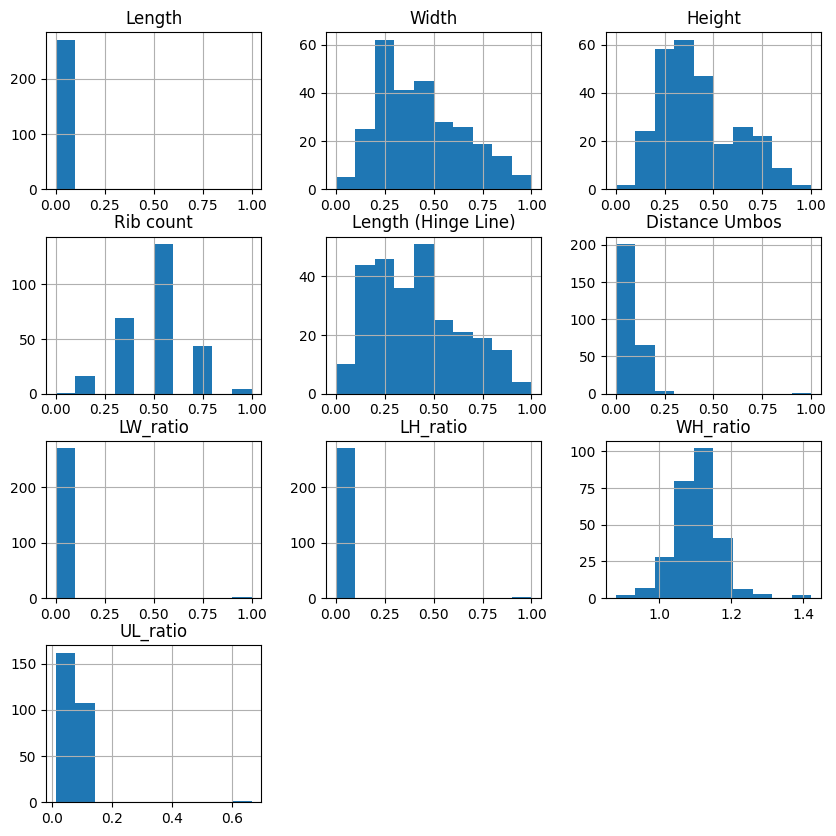

In [26]:
litob_combined_explore = litob_combined.drop(columns=['Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

Exploring the mean, std and etc


In [27]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.033792,0.438462,0.420663,0.561624,0.412619,0.079634,0.019017,0.025346,1.106220,0.074084
std,0.061737,0.219016,0.195854,0.168665,0.223435,0.070245,0.060042,0.059860,0.065081,0.042851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.878151,0.013401
25%,0.014796,0.253564,0.280347,0.400000,0.229927,0.045588,0.012346,0.017409,1.072006,0.056172
50%,0.027767,0.407332,0.375723,0.600000,0.385036,0.070588,0.014957,0.022010,1.111834,0.071809
75%,0.041716,0.586558,0.540462,0.600000,0.556569,0.101471,0.017914,0.026425,1.142283,0.085263
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.423237,0.666350


In [28]:
litob_combined.Label.value_counts()

,count
Label,
1,144
0,127


CHECKING FOR CLASS IMBALANCE

In [29]:
class_counts = litob_combined['Label'].value_counts()

## percentage of each class
class_percentages = class_counts / len(litob_combined) * 100
class_percentages

,count
Label,
1,53.136531
0,46.863469


Samples count visualizations

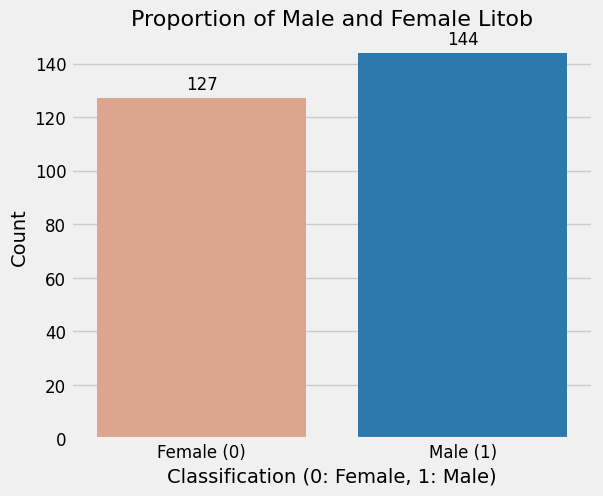

Proportions of Classes:


,count
Label,
1,0.531365
0,0.468635


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))

colors = {0: "#e9a080", 1: "#187cc1"}

ax = sns.countplot(x='Label', data=litob_combined, hue='Label', palette=colors, legend=False)
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),  # Converted to int
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.show()

counts = litob_combined.Label.value_counts()
proportions = counts / counts.sum()
print('Proportions of Classes:')
proportions

CHECKING CORRELATION

In [31]:
litob_features = litob_combined.columns.drop(['Label'])
x = litob_combined[litob_features]
y = litob_combined['Label']

variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,WH_ratio,UL_ratio,Label
0,0.026072,0.429735,0.339114,0.6,0.492701,0.089706,0.012637,0.025299,1.169518,0.085328,0
1,0.024378,0.221996,0.342967,0.6,0.476277,0.058824,0.026616,0.023227,1.007752,0.064346,0
2,0.013688,0.287169,0.304432,0.8,0.437956,0.101471,0.012008,0.016191,1.091200,0.103926,0
3,0.031287,0.325866,0.335260,0.8,0.364964,0.089706,0.024254,0.030905,1.093604,0.081918,0
4,0.005736,0.264766,0.348748,0.6,0.339416,0.069118,0.006581,0.004210,1.035494,0.084472,0
...,...,...,...,...,...,...,...,...,...,...,...
266,0.050189,0.639511,0.581888,0.6,0.666058,0.186765,0.017471,0.024939,1.111834,0.129145,1
267,0.023726,0.380855,0.412331,0.4,0.445255,0.088235,0.013985,0.016118,1.069016,0.085896,1
268,0.013036,0.181263,0.181118,0.4,0.312044,0.076471,0.019508,0.028660,1.122995,0.084785,1
269,0.037414,0.488798,0.489403,0.8,0.516423,0.088235,0.017588,0.021870,1.083218,0.077290,1


In [32]:
## correlation
correlation_matrix = variable_corr.corr()

label_correlations = correlation_matrix['Label'].drop('Label')
sorted_correlations = label_correlations.abs().sort_values(ascending=False)
sorted_correlations

,Label
WH_ratio,0.179385
UL_ratio,0.118159
Distance Umbos,0.116598
Length (Hinge Line),0.095076
Height,0.087302
Rib count,0.075821
LH_ratio,0.061386
LW_ratio,0.041469
Length,0.030452
Width,0.024582


CHECK FOR MULTICOLLINEARITY

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Create a new DataFrame with the selected features
X = female_litob[features]

# Add a constant column to include the intercept in the VIF calculation
X_const = add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_const.columns
vif['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Display VIF values
print(vif)

               Feature           VIF
0                const  30861.311770
1               Length    803.010227
2                Width    565.508707
3               Height    598.231333
4            Rib count      1.039023
5  Length (Hinge Line)      6.100017
6       Distance Umbos    337.166729
7             LW_ratio     70.132944
8             LH_ratio     80.752098
9             UL_ratio    307.728916


Correlation map

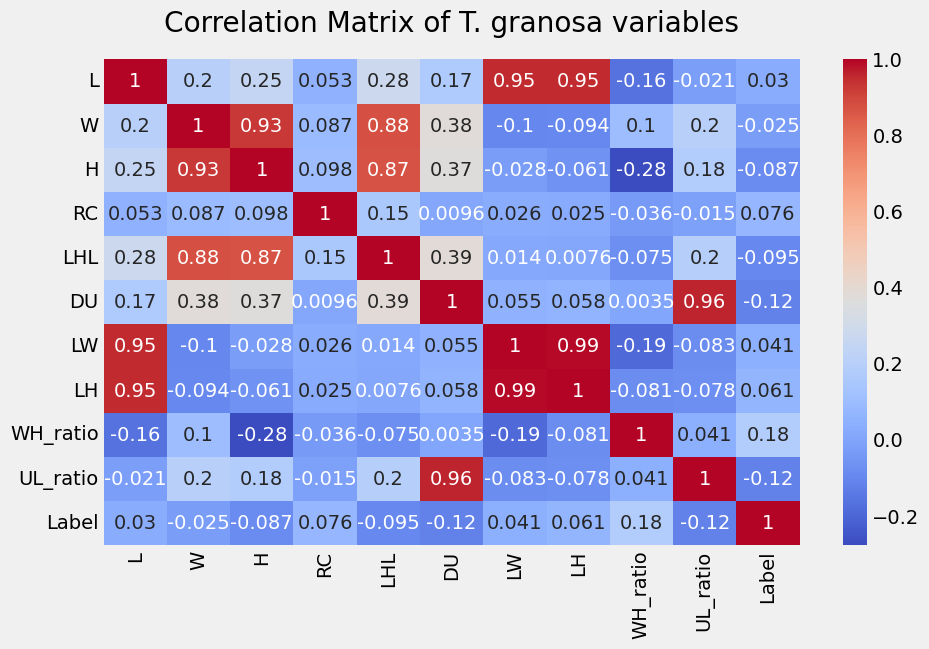

In [34]:
## col names and codenames
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'Label': 'Label'
}

variable_corr = variable_corr.rename(columns=codenames)

## display heatmap
corr = variable_corr.corr()
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix of T. granosa variables', pad=20)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

DATA GROUPED BASED ON LABEL

In [35]:
## mean and sd by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])
grouped_data

Length               Width              Height           Rib count  \
           mean       std      mean       std      mean       std      mean   
Label                                                                         
0      0.031794  0.019532  0.444184  0.230683  0.438836  0.199556  0.548031   
1      0.035554  0.082786  0.433415  0.208868  0.404635  0.191795  0.573611   

                Length (Hinge Line)           Distance Umbos            \
            std                mean       std           mean       std   
Label                                                                    
0      0.167545            0.435197  0.228881       0.088340  0.090631   
1      0.169320            0.392706  0.217370       0.071957  0.044185   

       LW_ratio           LH_ratio            UL_ratio            
           mean       std     mean       std      mean       std  
Label                                                             
0      0.016370  0.005816  0.02144  0.006666  0.079466  0.056338  
1      0.021351  0.082252  0.02879  0.081859  0.069338  0.024939

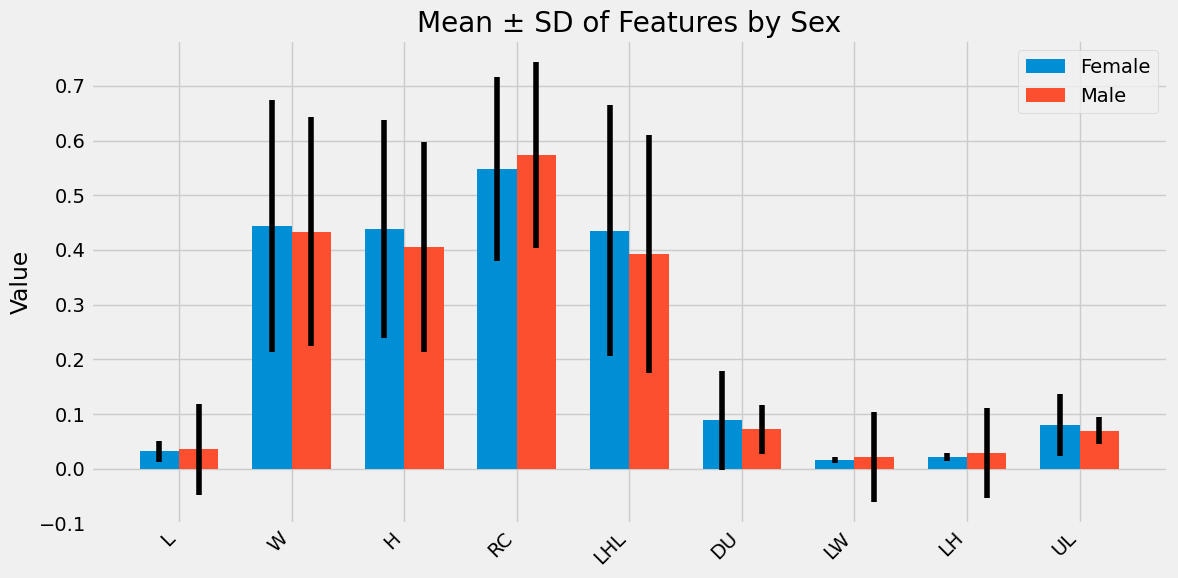

In [36]:
## mean and std by sex
grouped_data = litob_combined.groupby('Label')[features].agg(['mean', 'std'])

## plots
plt.figure(figsize=(12, 6))
x = range(len(features))
width = 0.35
for i, sex in enumerate([0, 1]):  ## iterate through male and female

    ## multiIndex column names -> accessing colnames
    # Use list comprehension to access all means in the correct order
    means = grouped_data.loc[sex, [(feature, 'mean') for feature in features]]
    # Use list comprehension to access all stds in the correct order
    stds = grouped_data.loc[sex, [(feature, 'std') for feature in features]]
    plt.bar([xi + i * width for xi in x], means, width, yerr=stds, label=f"{'Female' if sex == 0 else 'Male'}")

## codenames x-axis labels
# Add all codenames to the dictionary.
codenames = {
    'Length': 'L',
    'Width': 'W',
    'Height': 'H',
    'Rib count': 'RC',
    'Length (Hinge Line)': 'LHL',
    'Distance Umbos': 'DU',
    'LW_ratio': 'LW',
    'LH_ratio': 'LH',
    'WH_ratio':'WH',
    'UL_ratio':'UL'
}
plt.xticks([xi + width / 2 for xi in x], [codenames[feature] for feature in features], rotation=45, ha="right")

plt.ylabel("Value")
plt.title("Mean ± SD of Features by Sex")
plt.legend()
plt.tight_layout()
plt.show()

## Handling Imbalanced Dataset

In [37]:
! pip install -U imbalanced-learn

In [38]:
X = litob_combined.drop(['Label'], axis=1)
y = litob_combined['Label']

In [39]:
y.value_counts()

,count
Label,
1,144
0,127


<Axes: ylabel='count'>

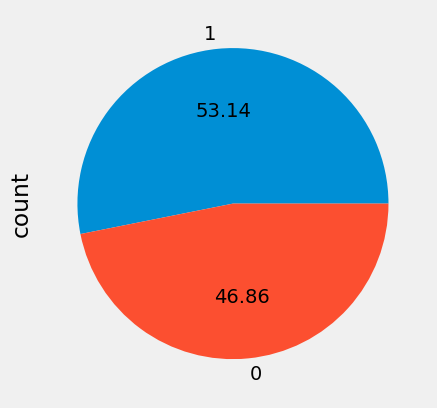

In [40]:
# Show pie plot
y.value_counts().plot.pie(autopct='%.2f')

##### Random Oversampling

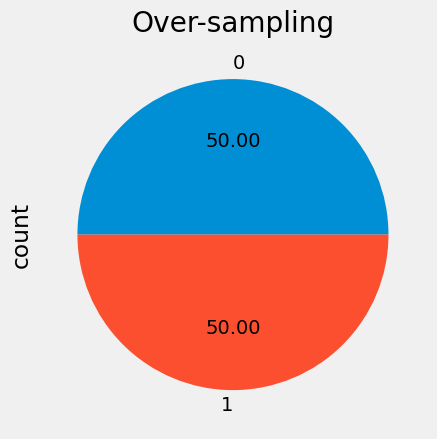

In [41]:
# "not majority" = resample all classes but the majority class

from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [67]:
# from google.colab import files

# oversampled_data = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

# # Check if the DataFrame has 288 samples
# if len(oversampled_data) == 288:
#   print("Dataset has 288 samples. Downloading...")
#   oversampled_data.to_csv('oversampled_dataset.csv', index=False)
#   files.download('oversampled_dataset.csv')
# else:
#   print(f"Error: The dataset has {len(oversampled_data)} samples, not 288.")

Dataset has 288 samples. Downloading...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
y_res.value_counts()

,count
Label,
0,144
1,144


##### SMOTE

In [44]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Define X and y
# X = litob_combined.drop(['Label'], axis=1)
# y = litob_combined['Label']

# # Check class distribution before SMOTE
# counter = Counter(y)
# print('Before SMOTE:', counter)

# # Apply SMOTE to the training data
# smt = SMOTE()
# X_sm, y_sm = smt.fit_resample(X, y)

# # Check class distribution after SMOTE
# counter_after = Counter(y_sm)
# print('After SMOTE:', counter_after)

In [45]:
# litob_combined_smote = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.Series(y_sm, name='Label')], axis=1)

# # Save the SMOTE-applied dataset to a CSV file
# litob_combined_smote.to_csv('litob_smote.csv', index=False)
# files.download('litob_smote.csv')

##### ADASYN

In [46]:
# from collections import Counter
# from imblearn.over_sampling import ADASYN

# # Check class distribution
# class_counts = Counter(y)
# print(f"Original class counts: {class_counts}")

# # Only apply ADASYN if dataset is imbalanced
# if min(class_counts.values()) / max(class_counts.values()) > 0.8:
#     print("Dataset is already balanced, skipping ADASYN.")
#     X_ada, y_ada = X, y  # No need for resampling
# else:
#     ada = ADASYN(sampling_strategy=1.0, random_state=42)
#     X_ada, y_ada = ada.fit_resample(X, y)

# # Check new class distribution
# print(f"New class counts: {Counter(y_ada)}")

##### Hybridization: SMOTE + Tomek Links

In [47]:
# from imblearn.combine import SMOTETomek
# from collections import Counter

# # Define X and y
# X = litob_combined.drop(['Label'], axis=1)
# y = litob_combined['Label']

# # Counting the number of instances in each class before oversampling
# counter = Counter(y)
# print('Before', counter)

# # Oversampling the train dataset using SMOTE + Tomek
# smtom = SMOTETomek(random_state=42)
# X_smtom, y_smtom = smtom.fit_resample(X, y)

# # Counting the number of instances in each class after oversampling
# counter_after = Counter(y_smtom)
# print('After', counter_after)

In [48]:
# litob_combined_smote = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.Series(y_sm, name='Label')], axis=1)

# # Save the SMOTE-applied dataset to a CSV file
# litob_combined_smote.to_csv('litob_smotetomek.csv', index=False)
# files.download('litob_smotetomek.csv')

## **MODEL TRAINING**

##### Logistic Regression

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='liblinear')  # Use 'liblinear' for smaller datasets
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Convert relevant metrics to percentages
df_report[['precision', 'recall', 'f1-score', 'support']] = df_report[['precision', 'recall', 'f1-score', 'support']].astype(float) * 100

# Display the table with percentages
df_report

,precision,recall,f1-score,support
0,48.571429,68.000000,56.666667,2500.000000
1,65.217391,45.454545,53.571429,3300.000000
accuracy,55.172414,55.172414,55.172414,55.172414
macro avg,56.894410,56.727273,55.119048,5800.000000
weighted avg,58.042407,55.172414,54.905583,5800.000000


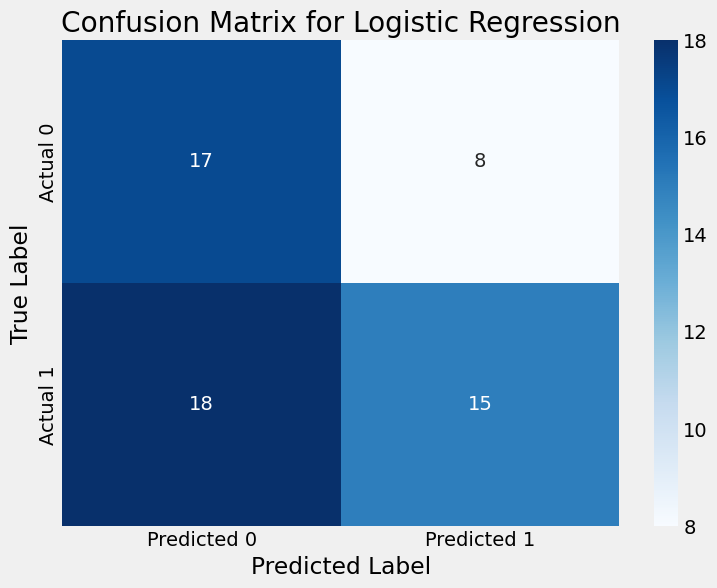

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [53]:
# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Convert relevant metrics to percentages
df_report[['precision', 'recall', 'f1-score', 'support']] = df_report[['precision', 'recall', 'f1-score', 'support']].astype(float) * 100

# Display the table with percentages
df_report

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
0,43.103448,100.000000,60.240964,2500.000000
1,0.000000,0.000000,0.000000,3300.000000
accuracy,43.103448,43.103448,43.103448,43.103448
macro avg,21.551724,50.000000,30.120482,5800.000000
weighted avg,18.579073,43.103448,25.965933,5800.000000


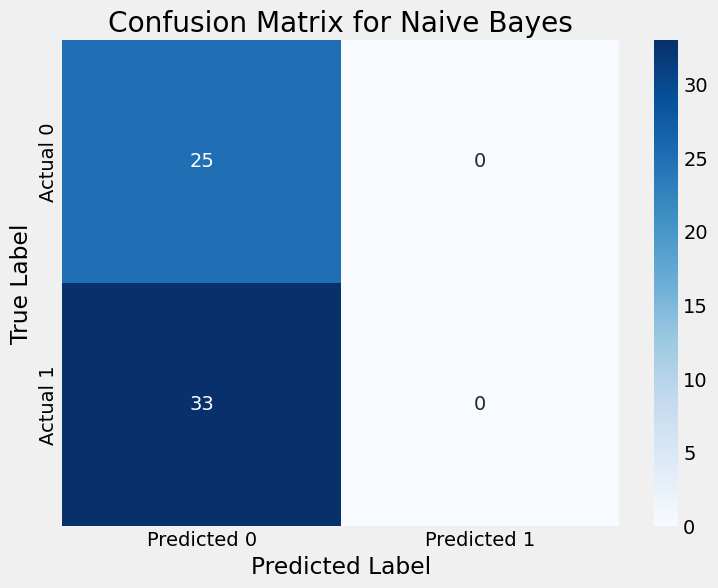

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### k-Nearest Neighbor

In [55]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the k-Nearest Neighbor model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

In [56]:
# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Convert relevant metrics to percentages
df_report[['precision', 'recall', 'f1-score', 'support']] = df_report[['precision', 'recall', 'f1-score', 'support']].astype(float) * 100

# Display the table with percentages
df_report

,precision,recall,f1-score,support
0,50.000000,68.000000,57.627119,2500.000000
1,66.666667,48.484848,56.140351,3300.000000
accuracy,56.896552,56.896552,56.896552,56.896552
macro avg,58.333333,58.242424,56.883735,5800.000000
weighted avg,59.482759,56.896552,56.781199,5800.000000


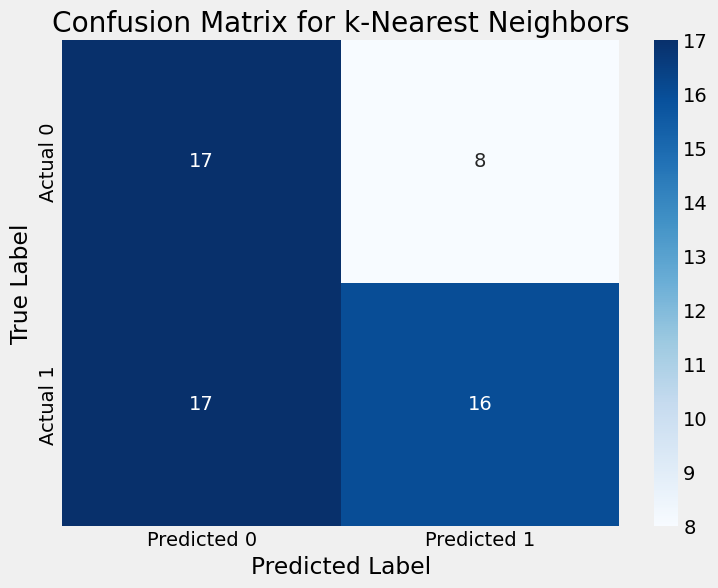

In [57]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for k-Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [59]:
# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Convert relevant metrics to percentages
df_report[['precision', 'recall', 'f1-score', 'support']] = df_report[['precision', 'recall', 'f1-score', 'support']].astype(float) * 100

# Display the table with percentages
df_report

,precision,recall,f1-score,support
0,51.612903,64.000000,57.142857,2500.00000
1,66.666667,54.545455,60.000000,3300.00000
accuracy,58.620690,58.620690,58.620690,58.62069
macro avg,59.139785,59.272727,58.571429,5800.00000
weighted avg,60.177976,58.620690,58.768473,5800.00000


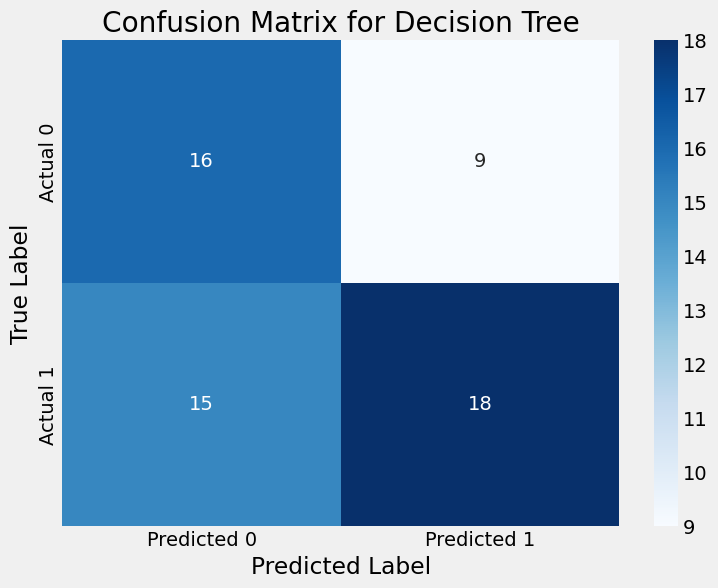

In [60]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### Support Vector Machine

In [61]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [62]:
# Evaluate the model
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Convert relevant metrics to percentages
df_report[['precision', 'recall', 'f1-score', 'support']] = df_report[['precision', 'recall', 'f1-score', 'support']].astype(float) * 100

# Display the table with percentages
df_report

,precision,recall,f1-score,support
0,40.476190,68.000000,50.746269,2500.000000
1,50.000000,24.242424,32.653061,3300.000000
accuracy,43.103448,43.103448,43.103448,43.103448
macro avg,45.238095,46.121212,41.699665,5800.000000
weighted avg,45.894910,43.103448,40.451858,5800.000000


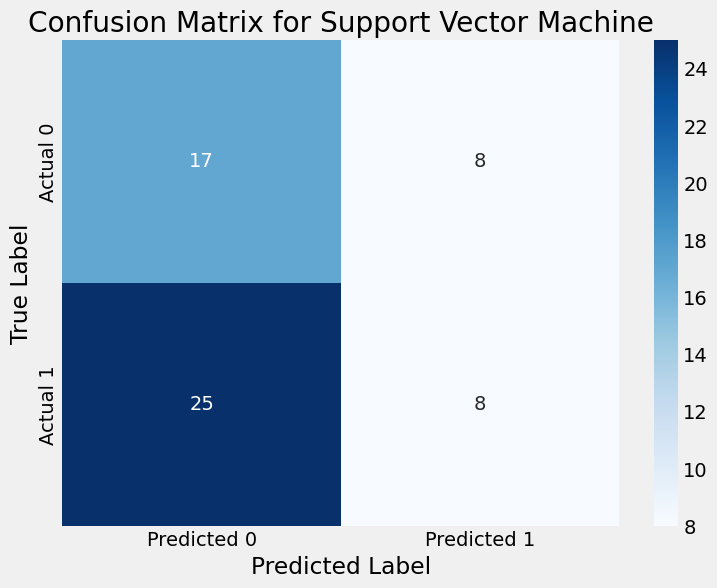

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

COMPARISON OF MODELS' PERFORMANCE

In [64]:
models = {
    'Logistic Regression': logreg,
    'Naive Bayes': nb_model,
    'k-Nearest Neighbors': knn_model,
    'Decision Tree': dt_model,
    'Support Vector Machine': svm_model
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_test, y_pred, average='binary') * 100  # Binary classification
    recall = recall_score(y_test, y_pred, average='binary') * 100  # Binary classification
    f1 = f1_score(y_test, y_pred, average='binary') * 100  # Binary classification
    results.append([name, accuracy, precision, recall, f1])

# Create a DataFrame and round values to 2 decimal places
comparison_df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-score (%)'])
comparison_df = comparison_df.round(2)  # Round for better readability

comparison_df

NameError: name 'accuracy_score' is not defined